Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "gluk2003"

---

# Часть I. Односторонние разностные схемы

Напишите функцию `deriv`, которая вычисляет производную функции в заданной точке $x$, используя одностороннюю разностную схему с заданным шагом $h$ и степенью аппроксимации $O(h^2)$.

In [2]:
def deriv(f, x, h):
    """ Вычисляет производную `f` в точке `x` с шагом `h`.
    Вычисляет производную, используя односторонню разностную схему со степенью аппроксимации $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        Функция, которую нужно продифференцировать
    x : float
        Точка, в которой нужно дифференцировать функцию
    h : float
        Шаг
        
    Rerurns
    -------
    fder : производная f(x) в точке x с шагом h.
    """
    # YOUR CODE HERE
    u_i = f(x)
    u_i1 = f(x + h)
    u_i2 = f(x + 2 * h)
    fder = (-3 * u_i + 4 * u_i1 - u_i2) / (2 * h)
    return fder

#### Тест I.1

Проверьте ваш алгоритм на простом примере: продифференцируйте $f(x) = x^3$ в точке $x=0$. Прокомментируйте, совпадает ли результат с ожидаемым $f'(x) = 0$ при стремлении $h\to 0$.

In [3]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))


0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


YOUR ANSWER HERE
При стремлении h к нулю, результат вычисление производной фукнции x**3 через схему стремится к ожидаемому 0, причем при уменьшении h в 10 раз ошибка уменьшается в 100 раз, то есть как O(h**2).

### Тест I.2

Теперь попробуйте немного более сложную функцию $f(x) = x^2 \log{x}$. Оцените значение производной в точке $x=1$, используя *двухточечную* и *трехточечную* схемы. Для обеих схем оцените значение $h$, при котором ошибка перестанет падать.

In [4]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

In [5]:
# YOUR CODE HERE
def tw_point(f, x, h):
    fder = (f(x + h) - f(x - h)) / (2 * h)
    return fder

def thr_point(f, x, h):
    u_i = f(x)
    u_i1 = f(x + h)
    u_i2 = f(x + 2 * h)
    fder = (-3 * u_i + 4 * u_i1 - u_i2) / (2 * h)
    return fder

h = [10**(-i) for i in range(1, 10)]
x = 1
print("two point method")
for i in range(0, 9):
    err = tw_point(f, x, h[i]) - fder(x)
    print(h[i], err)
print()
print("three point method")
for i in range(0, 9):
    err = thr_point(f, x, h[i]) - fder(x)
    print(h[i], err)

two point method
0.1 0.0033366762303623787
0.01 3.333366667712667e-05
0.001 3.333333118415993e-07
0.0001 3.3332232529659223e-09
1e-05 3.433342499192804e-11
1e-06 -2.6422086740751638e-11
1e-07 2.8759217229890055e-11
1e-08 -5.263560698409719e-10
1e-09 2.722921998987715e-08

three point method
0.1 -0.006208857651809341
0.01 -6.617128391550597e-05
0.001 -6.661673546126679e-07
0.0001 -6.666276974875984e-09
1e-05 -4.901234973431201e-11
1e-06 -1.9395574035740992e-10
1e-07 1.694084206249613e-09
1e-08 -1.7179702216374437e-08
1e-09 1.9376267412773984e-07


Для обеих схем значение h, при котором ошибка перестает падать, равняется примерно 10**(-6).

### Тест I.3 

Теперь продифференцируйте $x^2 \log(x)$ в $x=0$. Используйте трехточечную схему. Заметьте, что в нуле функцию нужно доопределить явным образом. Постройте зависимость ошибки от величины шага $h$. Объясните полученные результаты.



In [6]:
def f(x):
    if x == 0:
        # предел $x^2 log(x)$ при $x-> 0$ равен нулю, хотя log(x) не определен в x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


In [7]:
import numpy as np
import matplotlib.pyplot as plt

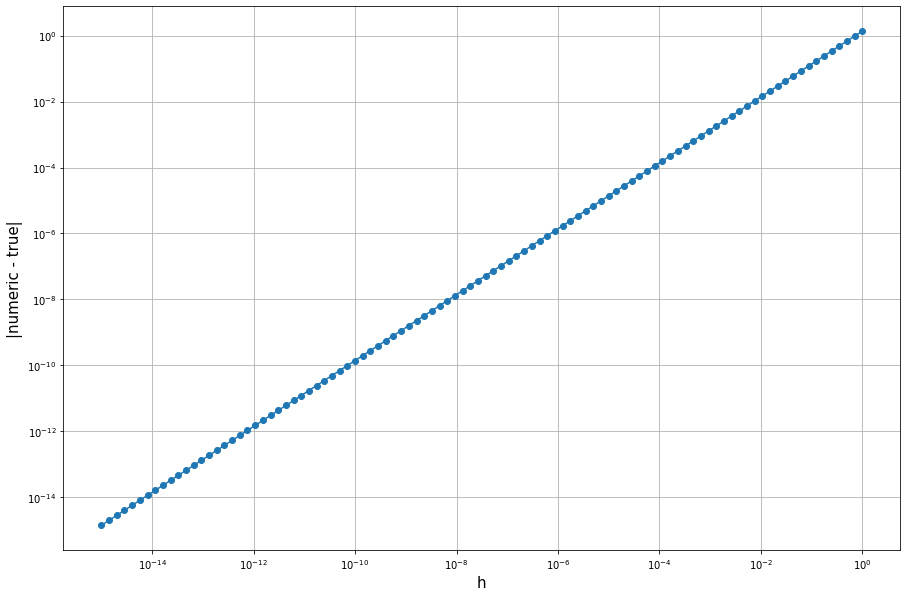

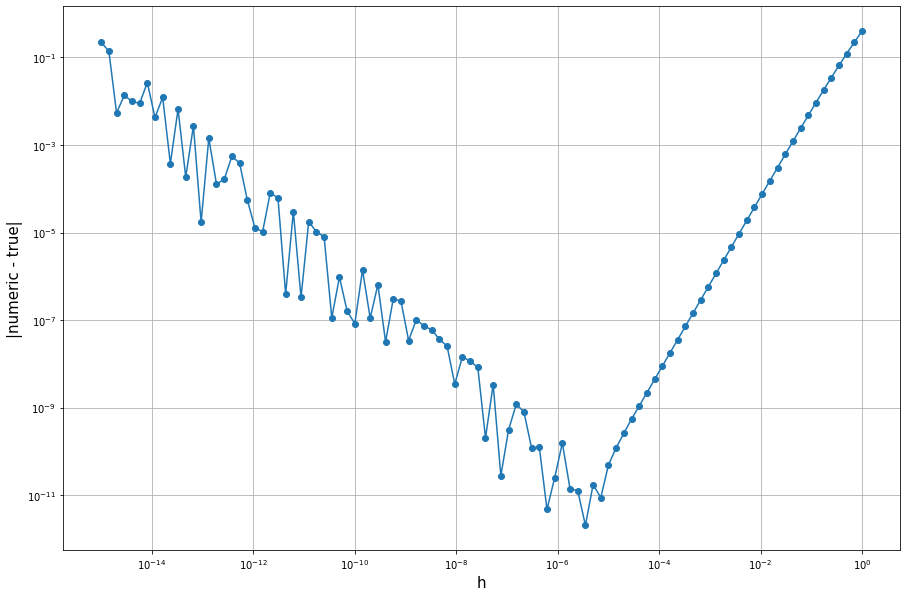

In [8]:
# YOUR CODE HER
x = 0
h = np.logspace(-15, 0, num=100)
err = [abs(deriv(f, x, h[i]) - fder(x)) for i in range(len(h))]
plt.figure(figsize=(15, 10))
plt.loglog(h, err, '-o')
plt.xlabel("h", fontsize=15)
plt.ylabel("|numeric - true|", fontsize=15)
plt.grid(True)

x = 1
err = [abs(deriv(f, x, h[i]) - fder(x)) for i in range(len(h))]
plt.figure(figsize=(15, 10))
plt.loglog(h, err, '-o')
plt.xlabel("h", fontsize=15)
plt.ylabel("|numeric - true|", fontsize=15)
plt.grid(True)

Для точки x = 1 наша оценка оправдывается: при h ~ 10**(-6) ошибка перестает падать. Такое поведение объясняется тем, что при маленьких h ошибка накапливается в следствие ошибки машинного округления, а при больших h она накапливается в основном за счет ошибки нашего приближения производной.
Для х = 0 ошибка растет прямо пропорционально шагу h, так как наше приближение совпадает с реальным занчением производной в точке 0, поэтому основной вклад сразу начинает вносить ошибка нашей схемы.

# Часть II. Midpoint rule

Напишите функцию, вычисляющую определенный интеграл, используя midpoint rule, с точностью до заданной погрешности $\epsilon$. Оценивайте ошибку, сравнивая значения интеграла для $N$ и $2N$ элементарных интервалов.

In [9]:
def midpoint_rule(func, a, b, eps):
    """ Вычисляет интеграл f от a до b используя правило центральной точки.
    
    Parameters
    ----------
    func : callable
        Функция, которую нужно проинтегрировать
    a : float
        Нижний предел интегрирования
    b : float
        Верхний предел интегрирования
    eps : float
        Ожидаемая ошибка оценки
        
    Returns
    -------
    integral : float
        Оценка интеграла $\int_a^b f(x) dx$.
    n : int
        The number of intervals on segment.
    """
    # YOUR CODE HERE
    n = 1
    i_n = func((a + b) / 2) * (b - a)
    i_2n = (func((a + (a + b) / 2) / 2) + func(((a + b) / 2 + b) / 2)) * (b - a) / 2
    while abs(i_2n - i_n) >= eps:
        n += 1

        h = (b - a) / n
        i = np.arange(1, n + 1)
        i_n = (func(a + (i - 0.5) * h) * h).sum()

        h = (b - a) / (2 * n)
        i = np.arange(1, 2 * n + 1)
        i_2n = (func(a + (i - 0.5) * h) * h).sum()

    integral = i_n 
    return integral, n

### Тест II.1

Протестирутйте ваш алгоритм на простом интеграле, который вы можете посчитать аналитически.

Сравните скорость сходимости с ожидаемой $O(N^{-2})$ в зависимости от количества интервалов, необходимых для заданной точности $\epsilon$.

Сравните полученный результат с ответом, вычисленным "руками". Попадает ли результат в интервал заданной ошибки?

(20% итоговой оценки)


Численное значение интеграла с точностью 10**(-2) 48.38733918804202


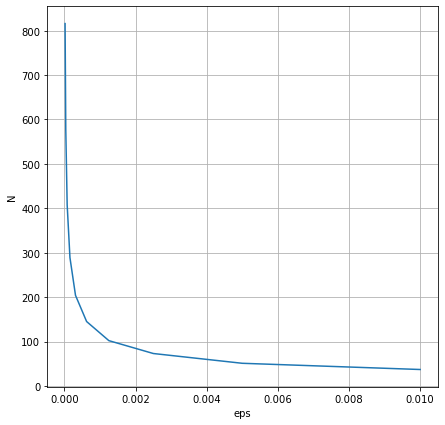

In [10]:
# YOUR CODE HERE
f = lambda x: x**4
a, b = 1, 3
intg, n = midpoint_rule(f, a, b, eps=10**(-2))
print("Численное значение интеграла с точностью 10**(-2)", intg)

eps = [0.01 / 2**(i) for i in range(10)]
N = [midpoint_rule(f, a, b, eps=0.01 / 2**(i))[1] for i in range(10)]
plt.figure(figsize=(7, 7))
plt.plot(eps, N)
plt.xlabel("eps")
plt.ylabel("N")
plt.grid(True)

Численное значение интеграла получилось равным 48.38733918804202, реальное значение -- 48.4. Результат не попадает в интервал заданной ошибки eps = 10 ** (-2). Это связано с тем, что мы приближенно измеряли ошибку как разность значений интеграла для N и 2N элементарных интервалов. 

По графику видно, что скорость сходимости совпадает с ожидаемой O(1 / N**2)

## Тест II.2

Используя ваш алгоритм, посчитайте значение

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

с точностью до $\epsilon=10^{-4}$.

Заметим, что интеграл содержит интегрируемую особенность в нижнем пределе. Выполните вычисление двумя способами: во первых, посчитайте интеграл "в лоб", во вторых, вычтите особенность из подынтегрального выражения. Сравните количество необходимых итераций для достижения заданной точности $\epsilon$.

(30% итоговой оценки)

In [15]:
# YOUR CODE HERE
# Произведем замену x --> sqrt(x)
f = lambda x: 2 * np.sin(x) / x
a, b = 0, 1
intg, n = midpoint_rule(f, a, b, eps=10**(-4))
print("Значение", intg, "при количестве интервалов n =", n)

# sin(sqrt(x)) / x = sin(sqrt(x)) / x - 1 / sqrt(x) + 1 / sqrt(x)
# x --> sqrt(x)
f = lambda x: 2 + np.sin(np.sqrt(x)) / x - 1 / np.sqrt(x)
intg, n = midpoint_rule(f, a, b, eps=10**(-4))
print("Значение", intg, "при количестве интервалов n =", n)

Значение 1.8922941998480554 при количестве интервалов n = 14
Значение 1.8920193180026728 при количестве интервалов n = 16


Таким образом, для достижения той же точности 2 способо понадобилось больше шагов.

# Часть  III 


Вычислите определённый интеграл **методом трапеций**  с вычитанием сингулярности

$$
I = \int_{0}^{1}\frac{e^x}{\sqrt{x(1-x)}}dx.
$$

Преобразуйте данный интеграл, вычитая сингулярности. Выпишите расчетные формулы.

Вам могут пригодиться значения следующих определенных интегралов:

$$
\int_0^1 \frac{1}{\sqrt{x (1-x)}} \, dx=\pi,\quad \int_0^1 \frac{x}{\sqrt{x (1-x)}} \, dx=\pi/2.
$$

YOUR ANSWER HERE

Cоставьте функцию, возвращающую значение интеграла методом трапеций.

In [12]:
def integ(npts=10):
    """Compute the value of the integral above.
    
    Subtract the singularities and use the trapezoid rule. 
    
    Parameters
    ----------
    npts : int
        The number of points for the trapezoid rule
        
    Returns
    -------
    I : float
       The computed value of the integral
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [13]:
# this is a test to check your computed value
from numpy.testing import assert_allclose
